# Data

We will begin the exploration of our data by importing the necessary libraries and uploading the reading the data from a CSV file into a <i>pandas</i> dataframe.  
  
Once data is in a dataframe, we will begin by exploring and visualizing the data to determine if there are any trends that immediately stick out and could be worth exploring further.  
  
Notes/observations are included under each of the explored data points below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

### Load Data from CSV file

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df = df_data_1
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

#### Let's see how many severity codes there are
1 - Property damage only collision<br>
2 - Injury collision

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df['SEVERITYCODE'].value_counts(normalize = True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

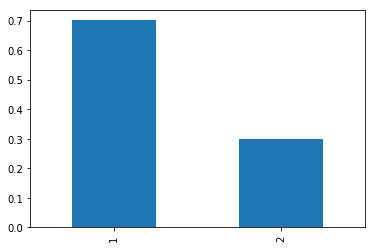

In [8]:
df['SEVERITYCODE'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

<i>We now have a baseline for the rate of accidents which include injury.  For purposes of discussion, we will say that 70% of the accidents result in only property damage, while roughly 30% result in injury.  
  
We can use this baseline to compare normalized rates of various conditions</i>

#### Light Conditions

In [9]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [10]:
df_light = df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()
df_light

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1203
                          2                 334
Dark - Street Lights Off  1                 883
                          2                 316
Dark - Street Lights On   1               34032
                          2               14475
Dark - Unknown Lighting   1                   7
                          2                   4
Dawn                      1                1678
                          2                 824
Daylight                  1               77593
                          2               38544
Dusk                      1                3958
                          2                1944
Other                     1                 183
                          2                  52
Unknown                   1               12868
                          2                 605
Name: SEVERITYCODE, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

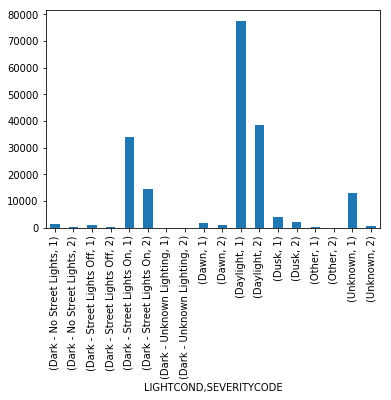

In [11]:
df_light.plot(kind = 'bar')
plt.show

In [12]:
df_light_norm = df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize = True)
df_light_norm


LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

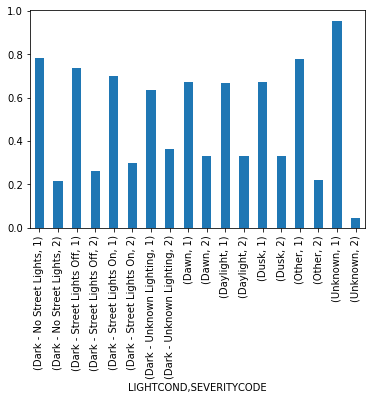

In [13]:
df_light_norm.plot(kind = 'bar')
plt.show

<i>The majority of accidents occur in</i> Daylight, <i>and</i> Dark - Street Lights On.  
  
<i>Lighting conditions appear to generally follow the base rate with some  variance</i>

#### Address Type

In [14]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [15]:
df_address = df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts()
df_address

ADDRTYPE      SEVERITYCODE
Alley         1                 669
              2                  82
Block         1               96830
              2               30096
Intersection  1               37251
              2               27819
Name: SEVERITYCODE, dtype: int64

In [16]:
df_address_norm = df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize = True)
df_address_norm

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

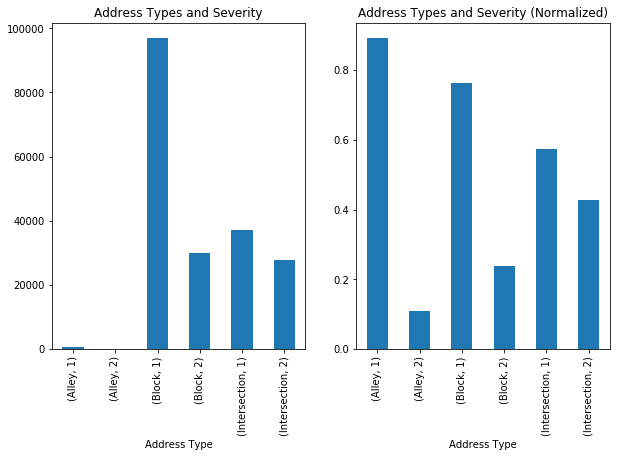

In [17]:
fig_address = plt.figure() # create figure

ax_address = fig_address.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_address_norm = fig_address.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_address.plot(kind='bar', figsize = (10,6), ax=ax_address) # add to subplot 1
ax_address.set_title('Address Types and Severity')
ax_address.set_xlabel('Address Type')


# Subplot 2: Line plot
df_address_norm.plot(kind='bar', figsize = (10,6), ax=ax_address_norm) # add to subplot 1
ax_address_norm.set_title('Address Types and Severity (Normalized)')
ax_address_norm.set_xlabel('Address Type')

plt.show()

<i>The majority of accidents occur in the middle of a block, and are largely property-damage only.  While there are far fewer interection accidents, intersections appear to have a far higher likelihood of injury</i>

#### Collision Type

In [18]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [19]:
df_collision = df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()
df_collision

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Name: SEVERITYCODE, dtype: int64

In [20]:
df_collision_norm = df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True)
df_collision_norm

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Name: SEVERITYCODE, dtype: float64

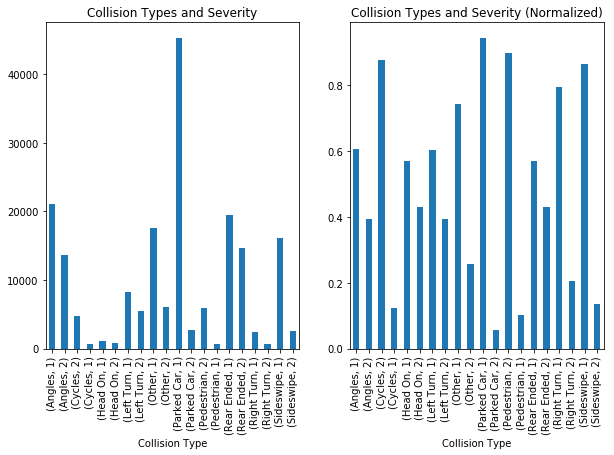

In [21]:
fig_collision = plt.figure() # create figure

ax_coll = fig_collision.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_coll_norm = fig_collision.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_collision.plot(kind='bar', figsize = (10,6), ax=ax_coll) # add to subplot 1
ax_coll.set_title('Collision Types and Severity')
ax_coll.set_xlabel('Collision Type')


# Subplot 2: Line plot
df_collision_norm.plot(kind='bar', figsize = (10,6), ax=ax_coll_norm) # add to subplot 1
ax_coll_norm.set_title('Collision Types and Severity (Normalized)')
ax_coll_norm.set_xlabel('Collision Type')

plt.show()

<i>There appear to be a few collision types which have a disproportionate result</i>  
Angles - 39.3% injury  
Head on - 43.1% injury  
Parked car - 94.5% property damage only  
Pedestrian - 89.9% injury  
  
<i>The type of collision appears to have a significant impact on the likelihood of injury</i>


#### Under Influence

In [22]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [23]:
df_underinfl = df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()
df_underinfl

UNDERINFL  SEVERITYCODE
0          1               57693
           2               22701
1          1                2372
           2                1623
N          1               69378
           2               30896
Y          1                3187
           2                1939
Name: SEVERITYCODE, dtype: int64

In [24]:
df_underinfl_norm = df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize = True)
df_underinfl_norm

UNDERINFL  SEVERITYCODE
0          1               0.717628
           2               0.282372
1          1               0.593742
           2               0.406258
N          1               0.691884
           2               0.308116
Y          1               0.621732
           2               0.378268
Name: SEVERITYCODE, dtype: float64

<i>Investigate what 0,1 classifications are.  Presumably, N = 0, Y = 1?  
Assuming that Y = 1, "Y" has a higher likelihood of involving injury when compared to the baseline</i>

#### Weather

In [25]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [26]:
df_weather = df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()
df_weather

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  41
                          2                  15
Clear                     1               75295
                          2               35840
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                 716
                          2                 116
Overcast                  1               18969
                          2                8745
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21969
                          2               11176
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 736
                          2                 171
U

In [27]:
df_weather_norm = df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize = True)
df_weather_norm

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

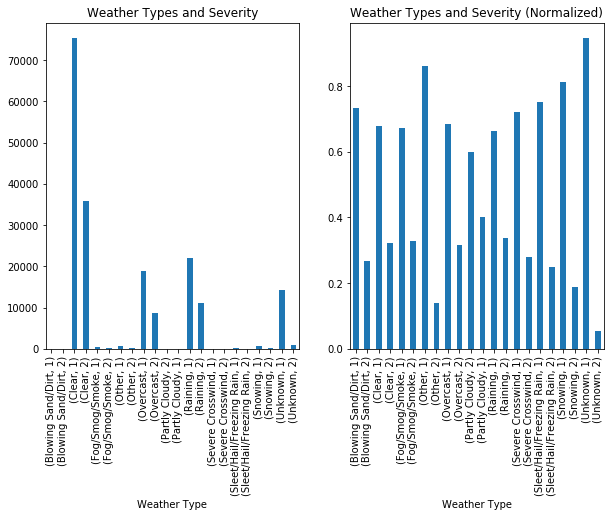

In [28]:
fig_weather = plt.figure() # create figure

ax_weather = fig_weather.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_weather_norm = fig_weather.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_weather.plot(kind='bar', figsize = (10,6), ax=ax_weather) # add to subplot 1
ax_weather.set_title('Weather Types and Severity')
ax_weather.set_xlabel('Weather Type')


# Subplot 2: Line plot
df_weather_norm.plot(kind='bar', figsize = (10,6), ax=ax_weather_norm) # add to subplot 1
ax_weather_norm.set_title('Weather Types and Severity (Normalized)')
ax_weather_norm.set_xlabel('Weather Type')

plt.show()

<i>Most weather instances are</i> Clear, Raining, Overcast.  
  
<i>All of these have a slightly higher percentage of injury.  I initially found it surprising that adverse weather conditions did not result in greater injury.  Perhaps this is due to more alert, careful driving in adverse conditions.  
  
I was initially surprised to see that </i> Partly Cloudy <i>had a 60% rate of personal injury, but with only 5 instances, the sample size is too small to really draw any meaningful conclusions</i>

#### Speeding

In [29]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [30]:
df_speed = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts()
df_speed

SPEEDING  SEVERITYCODE
Y         1               5802
          2               3531
Name: SEVERITYCODE, dtype: int64

In [31]:
df_speed_norm = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize = True)
df_speed_norm

SPEEDING  SEVERITYCODE
Y         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

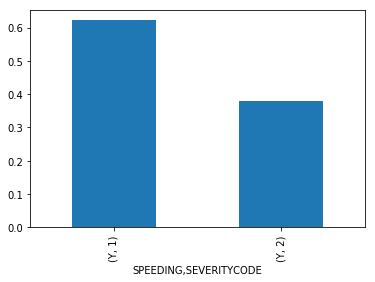

In [32]:
df_speed_norm.plot(kind = 'bar')
plt.show()

<i> With only 9,333 accidents reflecting speeding, we will need to update 'Y' to 1, 'Nan' to 0, so all accidents will be taken into account.  
  
Speed appears to have a higher likelihood of involving injury when compared to the baseline - 37.8%</i>

#### Road Conditions

In [33]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [34]:
df_cond = df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()
df_cond

ROADCOND        SEVERITYCODE
Dry             1               84446
                2               40064
Ice             1                 936
                2                 273
Oil             1                  40
                2                  24
Other           1                  89
                2                  43
Sand/Mud/Dirt   1                  52
                2                  23
Snow/Slush      1                 837
                2                 167
Standing Water  1                  85
                2                  30
Unknown         1               14329
                2                 749
Wet             1               31719
                2               15755
Name: SEVERITYCODE, dtype: int64

In [35]:
df_cond_norm = df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize = True)
df_cond_norm

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

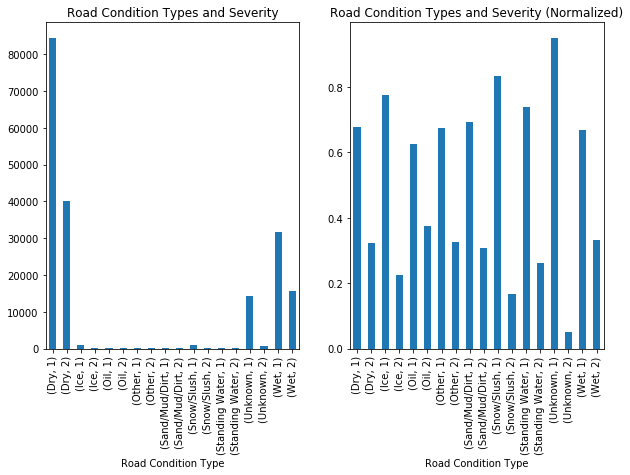

In [36]:
fig_conditions = plt.figure() # create figure

ax_cond = fig_conditions.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_cond_norm = fig_conditions.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_cond.plot(kind='bar', figsize = (10,6), ax=ax_cond) # add to subplot 1
ax_cond.set_title('Road Condition Types and Severity')
ax_cond.set_xlabel('Road Condition Type')


# Subplot 2: Line plot
df_cond_norm.plot(kind='bar', figsize = (10,6), ax=ax_cond_norm) # add to subplot 1
ax_cond_norm.set_title('Road Condition Types and Severity (Normalized)')
ax_cond_norm.set_xlabel('Road Condition Type')

plt.show()

<i>Road conditions appear to have similar results to weather.  Worse road conditions may result in different driving habits which may have higher probability of property damage, but with more careful driving, may minimize the injury risks</i>

#### Inattention

In [37]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [38]:
df_attention = df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts()
df_attention

INATTENTIONIND  SEVERITYCODE
Y               1               19408
                2               10397
Name: SEVERITYCODE, dtype: int64

In [39]:
df_attention_norm = df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize = True)
df_attention_norm

INATTENTIONIND  SEVERITYCODE
Y               1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64

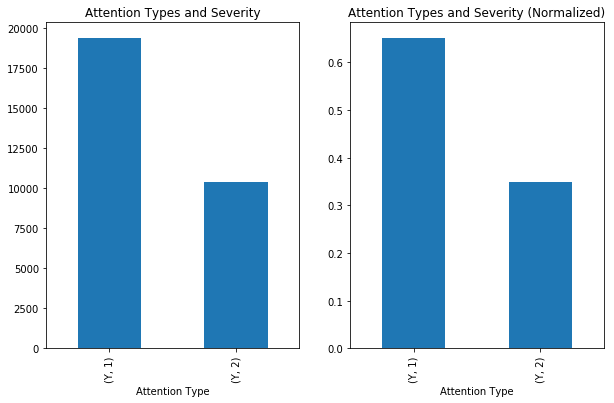

In [40]:
fig_attention = plt.figure() # create figure

ax_attention = fig_attention.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_attention_norm = fig_attention.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_attention.plot(kind='bar', figsize = (10,6), ax=ax_attention) # add to subplot 1
ax_attention.set_title('Attention Types and Severity')
ax_attention.set_xlabel('Attention Type')


# Subplot 2: Line plot
df_attention_norm.plot(kind='bar', figsize = (10,6), ax=ax_attention_norm) # add to subplot 1
ax_attention_norm.set_title('Attention Types and Severity (Normalized)')
ax_attention_norm.set_xlabel('Attention Type')

plt.show()

<i>With only 29,805 accidents reflecting 'inattention,' we will need to update 'Y' to 1, and 'Nan' to 0, so all accidents will be taken into account.  
  
Inattention has a higher percentage of injury than the baseline</i>

#### State Code Description

In [41]:
df['ST_COLDESC'].value_counts()

One parked--one moving                                                                   44421
Entering at angle                                                                        34674
From same direction - both going straight - one stopped - rear-end                       25771
Fixed object                                                                             13554
From same direction - both going straight - both moving - sideswipe                      12777
From opposite direction - one left turn - one straight                                   10324
From same direction - both going straight - both moving - rear-end                        7629
Vehicle - Pedalcyclist                                                                    4701
From same direction - all others                                                          4537
From same direction - one left turn - one straight                                        3093
From same direction - one right turn - one straigh

<i>With so many possible classifications, I am not certain there is much value to be gained by going down this route</i>

#### Hit parked car

In [42]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [43]:
df_parked = df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts()
df_parked

HITPARKEDCAR  SEVERITYCODE
N             1               129717
              2                57740
Y             1                 6768
              2                  448
Name: SEVERITYCODE, dtype: int64

In [44]:
df_parked_norm = df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize = True)
df_parked_norm

HITPARKEDCAR  SEVERITYCODE
N             1               0.691983
              2               0.308017
Y             1               0.937916
              2               0.062084
Name: SEVERITYCODE, dtype: float64

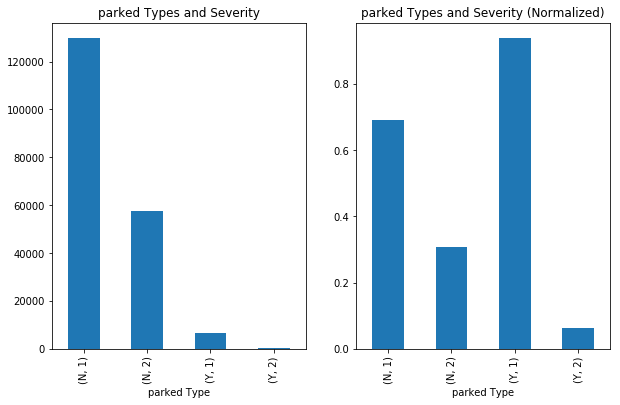

In [45]:
fig_parked = plt.figure() # create figure

ax_parked = fig_parked.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_parked_norm = fig_parked.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_parked.plot(kind='bar', figsize = (10,6), ax=ax_parked) # add to subplot 1
ax_parked.set_title('parked Types and Severity')
ax_parked.set_xlabel('parked Type')


# Subplot 2: Line plot
df_parked_norm.plot(kind='bar', figsize = (10,6), ax=ax_parked_norm) # add to subplot 1
ax_parked_norm.set_title('parked Types and Severity (Normalized)')
ax_parked_norm.set_xlabel('parked Type')

plt.show()

<i>Hitting a parked car results in only property damage 93.8% of the time.  Not hitting a parked car follows the baseline</i>